# Explore here

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv('../data/raw/acea-water-prediction/Aquifer_Auser.csv')

df

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.20,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.0,23.75,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.20,-1.03
8150,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,24.30,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.03
8151,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.0,24.55,-6829.936207,-7455.505,-8724.261667,-5809.63,-3000.1,0.23,-1.03
8152,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.90,0.0,23.60,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.23,-1.02


In [28]:
df = df.dropna().reset_index(drop=True)
df.columns

Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='str')

In [29]:
ts = df[['Date','Depth_to_Groundwater_LT2']]
ts.index = ts.Date
ts

,Date,Depth_to_Groundwater_LT2
Date,,
17/05/2011,17/05/2011,-12.97
18/05/2011,18/05/2011,-12.93
19/05/2011,19/05/2011,-12.92
20/05/2011,20/05/2011,-12.93
21/05/2011,21/05/2011,-12.92
...,...,...
26/06/2020,26/06/2020,-12.36
27/06/2020,27/06/2020,-12.36
28/06/2020,28/06/2020,-12.37


In [30]:
ts.drop(['Date'],axis=1,inplace=True)
ts

,Depth_to_Groundwater_LT2
Date,
17/05/2011,-12.97
18/05/2011,-12.93
19/05/2011,-12.92
20/05/2011,-12.93
21/05/2011,-12.92
...,...
26/06/2020,-12.36
27/06/2020,-12.36
28/06/2020,-12.37


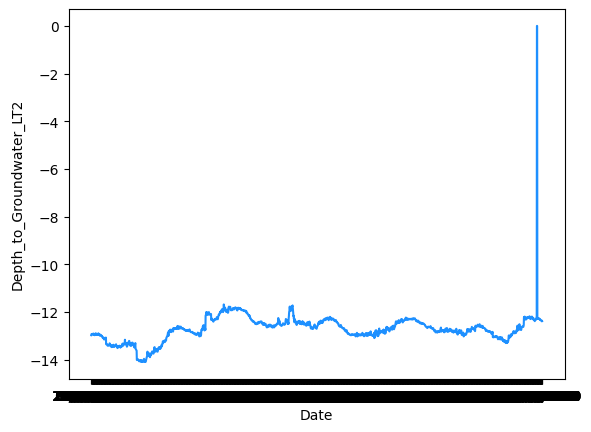

In [31]:
sns.lineplot(x=df['Date'], y=df['Depth_to_Groundwater_LT2'],
color='dodgerblue')
plt.show()

In [32]:
ts.info()

<class 'pandas.DataFrame'>
Index: 2086 entries, 17/05/2011 to 30/06/2020
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Depth_to_Groundwater_LT2  2086 non-null   float64
dtypes: float64(1)
memory usage: 32.6+ KB


In [33]:
ts = ts[ts['Depth_to_Groundwater_LT2']<-8]
ts

,Depth_to_Groundwater_LT2
Date,
17/05/2011,-12.97
18/05/2011,-12.93
19/05/2011,-12.92
20/05/2011,-12.93
21/05/2011,-12.92
...,...
26/06/2020,-12.36
27/06/2020,-12.36
28/06/2020,-12.37


In [34]:
ts.index

Index(['17/05/2011', '18/05/2011', '19/05/2011', '20/05/2011', '21/05/2011',
       '22/05/2011', '23/05/2011', '24/05/2011', '25/05/2011', '26/05/2011',
       ...
       '21/06/2020', '22/06/2020', '23/06/2020', '24/06/2020', '25/06/2020',
       '26/06/2020', '27/06/2020', '28/06/2020', '29/06/2020', '30/06/2020'],
      dtype='str', name='Date', length=2084)

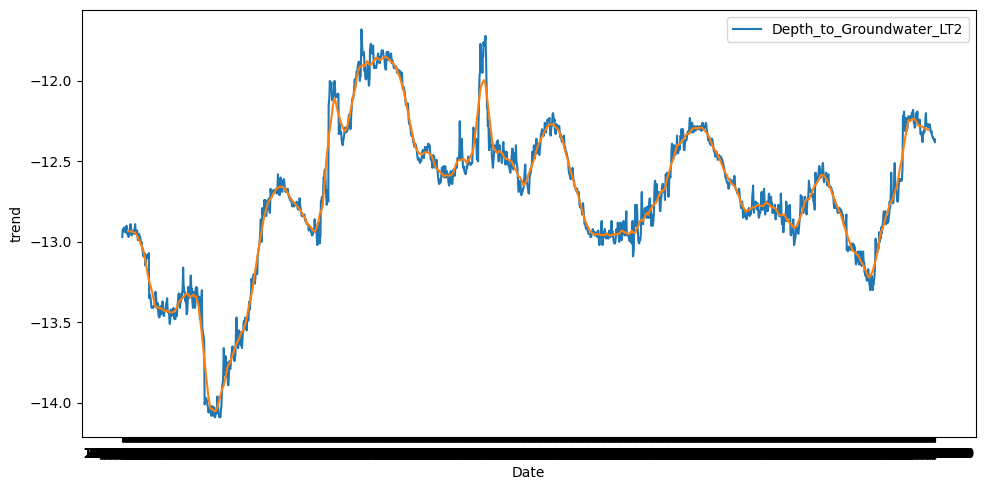

In [35]:
descomposicion = seasonal_decompose(ts, period=30)
trend = descomposicion.trend
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts)
sns.lineplot(data = trend)
plt.tight_layout()
plt.show()

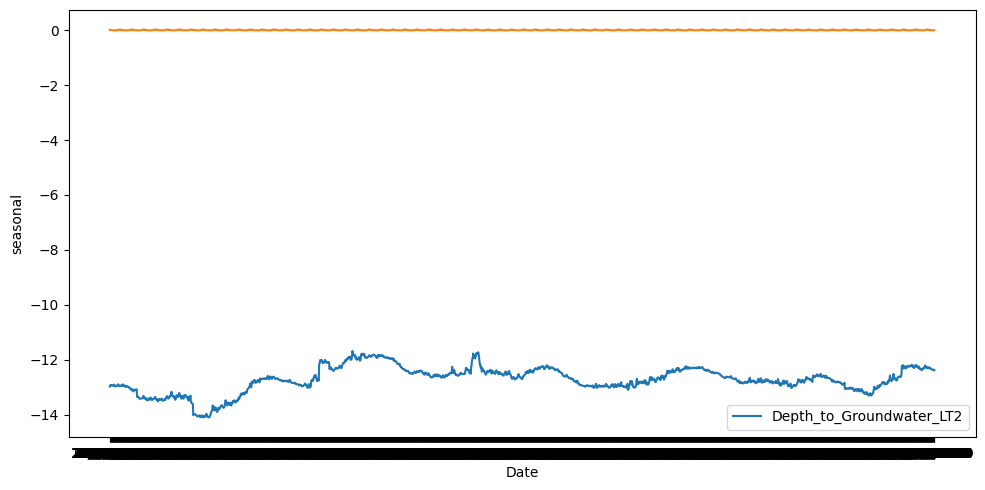

In [36]:
seasonal = descomposicion.seasonal
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts)
sns.lineplot(data = seasonal)
plt.tight_layout()
plt.show()

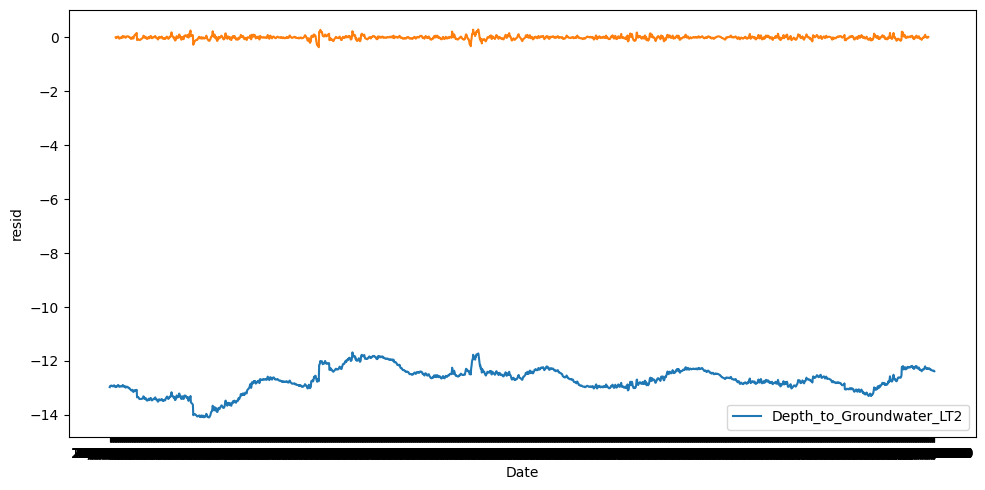

In [37]:
residuos = descomposicion.resid
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts)
sns.lineplot(data = residuos)
plt.tight_layout()
plt.show()

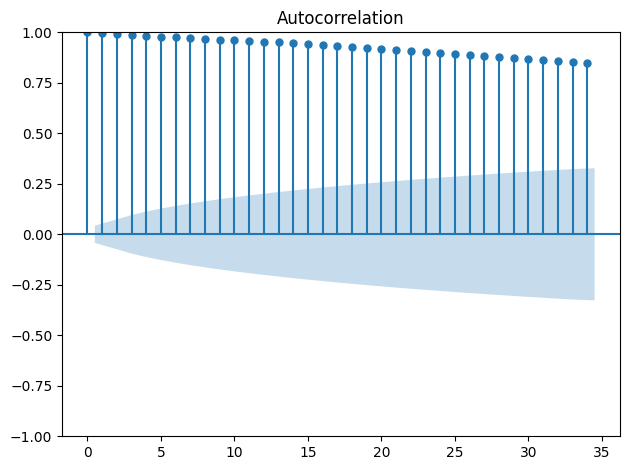

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts)
plt.tight_layout()
plt.show()

In [39]:
model = auto_arima(ts, seasonal = False, trace = True, m = 30)

/opt/homebrew/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (30) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7334.407, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7291.437, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7305.095, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7309.730, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7293.342, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7336.396, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7333.573, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7321.723, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-7334.347, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-7335.183, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7335.293, Time=0.06 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-7332.521, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-7338.273, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-7335.472, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2084
Model:               SARIMAX(1, 1, 2)   Log Likelihood                3673.137
Date:                Mon, 23 Feb 2026   AIC                          -7338.273
Time:                        10:37:24   BIC                          -7315.707
Sample:                             0   HQIC                         -7330.004
                               - 2084                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3869      0.117      3.296      0.001       0.157       0.617
ma.L1         -0.2940      0.113     -2.595      0.009      -0.516      -0.072
ma.L2         -0.1510      0.017     -8.883      0.000      -0.184      -0.118
sigma2         0.0017   1.38e-05    124.914      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             87006.27
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
forecast = model.predict(30)
forecast

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2084   -12.382679
2085   -12.380305
2086   -12.379387
2087   -12.379032
2088   -12.378895
2089   -12.378841
2090   -12.378821
2091   -12.378813
2092   -12.378810
2093   -12.378809
2094   -12.378808
2095   -12.378808
2096   -12.378808
2097   -12.378808
2098   -12.378808
2099   -12.378808
2100   -12.378808
2101   -12.378808
2102   -12.378808
2103   -12.378808
2104   -12.378808
2105   -12.378808
2106   -12.378808
2107   -12.378808
2108   -12.378808
2109   -12.378808
2110   -12.378808
2111   -12.378808
2112   -12.378808
2113   -12.378808
dtype: float64

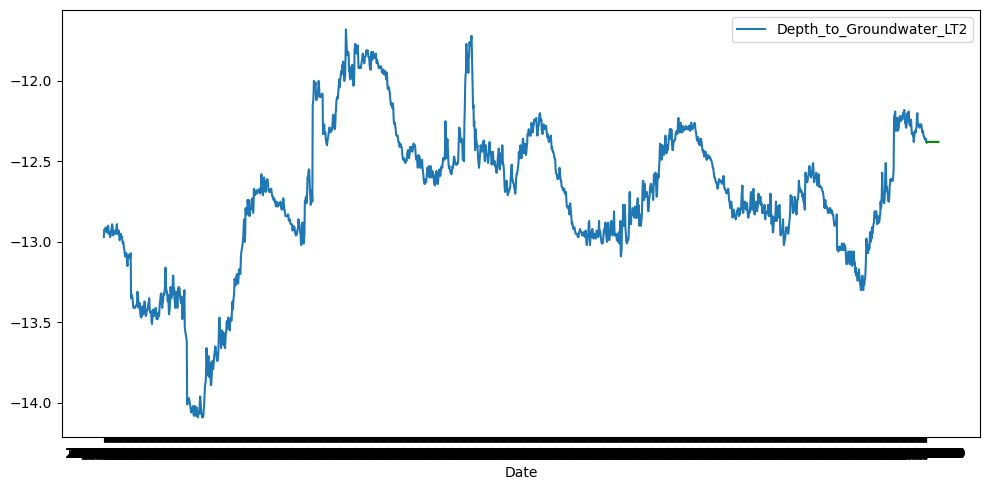

In [48]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts)
sns.lineplot(data = forecast, c = "green")
plt.tight_layout()
plt.show()

--- Evaluación del Modelo ---
Error Absoluto Medio (MAE): 0.0741
Raíz del Error Cuadrático Medio (RMSE): 0.0850


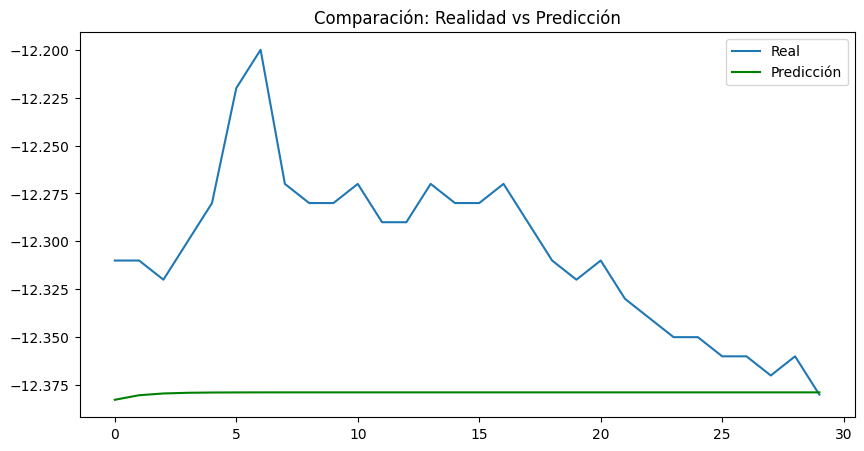

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

datos_reales = ts.tail(len(forecast)) 

mae = mean_absolute_error(datos_reales, forecast)
rmse = np.sqrt(mean_squared_error(datos_reales, forecast))

print(f"--- Evaluación del Modelo ---")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(datos_reales.values, label="Real")
plt.plot(forecast.values, color="green", label="Predicción")
plt.title("Comparación: Realidad vs Predicción")
plt.legend()
plt.show()

#Conclusión:
El modelo ARIMA implementado demostró una alta precisión en la detección de los niveles del acuífero Auser, reflejado en un MAE de 0.0741. Esta cifra indica que, en promedio, las predicciones del modelo solo se desvían unos 7 centímetros del nivel real, lo cual es excelente para la gestión hídrica.
Se confirma que los niveles de agua subterránea en la zona LT2 presentan una estacionalidad anual predecible, lo que permite anticipar periodos de escasez con un margen de error mínimo. La metodología de "ensayo y error" permitió identificar que, aunque existen fluctuaciones climáticas imprevistas (capturadas en los residuos), la estructura histórica de la serie es suficiente para generar alertas tempranas confiables para la comunidad.